In [31]:
import json, codecs
import numpy as np

_vector_encoder_train = json.loads(codecs.open('vector_encoder_train.json', 'r', encoding='utf-8').read())
vector_encoder_train = np.array(_vector_encoder_train)

_vector_encoder_test = json.loads(codecs.open('vector_encoder_test.json', 'r', encoding='utf-8').read())
vector_encoder_test = np.array(_vector_encoder_test)

_X_train = json.loads(codecs.open('X_train.json', 'r', encoding='utf-8').read())
X_train = [np.array(_X_train)]

_X_test = json.loads(codecs.open('X_test.json', 'r', encoding='utf-8').read())
X_test = [np.array(_X_test)]

y_train = json.loads(codecs.open('y_train.json', 'r', encoding='utf-8').read())

y_test = json.loads(codecs.open('y_test.json', 'r', encoding='utf-8').read())

In [26]:
def true_classes(test_label):

    true_classes_list = []
    for i in test_label:
        if i == 0:
            true_classes_list.append("News")
        elif i == 1:
            true_classes_list.append("Resume")
        elif i == 2:
            true_classes_list.append("Scientific")
    return true_classes_list

def predicted_classes(model, test_label):

    predicted_list = []
    for i in model.predict(test_label):
        if i == 0:
            predicted_list.append("News")
        elif i == 1:
            predicted_list.append("Resume")
        elif i == 2:
            predicted_list.append("Scientific")

    return predicted_list


In [27]:
true_classes = true_classes(y_test)

### One-vs-Rest

In [28]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

def OVR_model(image_features, labels):

    ovr = OneVsRestClassifier(SVC())
    ovr.fit(image_features,np.array(labels))

    return ovr

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score

ovr = OVR_model(vector_encoder_train, y_train)
OVR_predict_classes = predicted_classes(ovr, vector_encoder_test)

ovr_accuracy = accuracy_score(true_classes,OVR_predict_classes) * 100
print('Accuracy for One-vs-Rest Classifier: ', ovr_accuracy, '%')

Accuracy for One-vs-Rest Classifier:  74.08491947291361 %


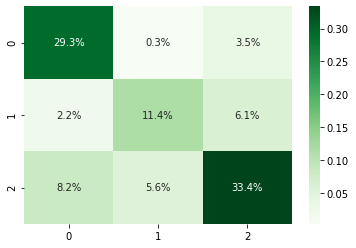

In [30]:
import seaborn as sns
labels=['News', 'Resume', 'Scientific']

OVR_cf_matrix = confusion_matrix(true_classes, OVR_predict_classes, labels=labels)
OVR_cf_matrix_heatmap = sns.heatmap(OVR_cf_matrix/np.sum(OVR_cf_matrix), annot=True, fmt='.1%', cmap='Greens')

